<a href="https://colab.research.google.com/github/riponalmamun/Basic_Model_WITHOUT-BACKGROUND/blob/main/Basic_Model_WITHOUT_BACKGROUND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASIC Model

In [1]:
import zipfile
import os

zip_path = '/content/Genitalia_Balanced_DATASET.zip'
extract_dir = '/content/Genitalia_Balanced_DATASET'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents
for root, dirs, files in os.walk(extract_dir):
    print(f"📁 Folder: {root}")
    for file in files:
        print(f"  📄 {file}")
    break  # Remove this if you want to list all subfolders too

📁 Folder: /content/Genitalia_Balanced_DATASET


🧾 Classes found: ['Ph_alexandri_female', 'Ph_alexandri_male', 'Ph_papatasi_female', 'Ph_papatasi_male', 'Ph_sergenti_female', 'Ph_sergenti_male']

📊 Image count per class:
  Ph_alexandri_female: 243 images
  Ph_alexandri_male: 243 images
  Ph_papatasi_female: 243 images
  Ph_papatasi_male: 243 images
  Ph_sergenti_female: 243 images
  Ph_sergenti_male: 243 images


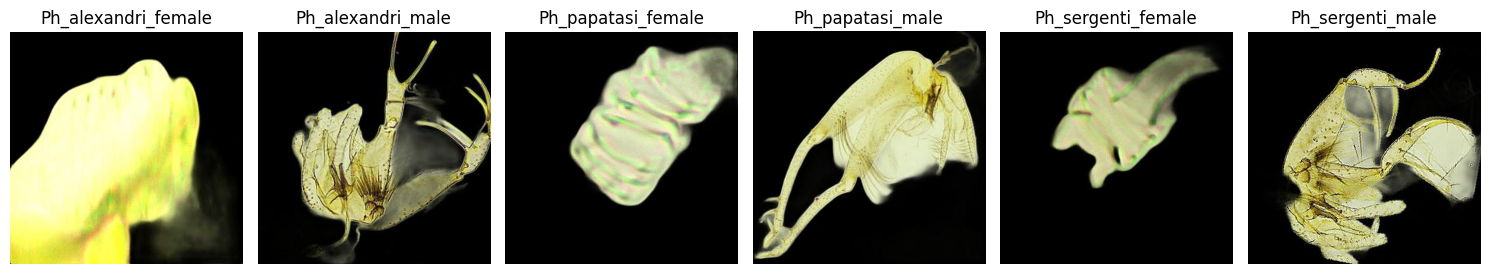

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set dataset directory
data_dir = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET'

# List class folders
classes = sorted(os.listdir(data_dir))
print("🧾 Classes found:", classes)

# Count images per class
class_counts = {}
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[cls] = count

print("\n📊 Image count per class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")

# Show a sample image from each class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, cls in enumerate(classes):
    cls_path = os.path.join(data_dir, cls)
    img_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if img_files:
        img = mpimg.imread(os.path.join(cls_path, img_files[0]))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(cls)

plt.tight_layout()
plt.show()


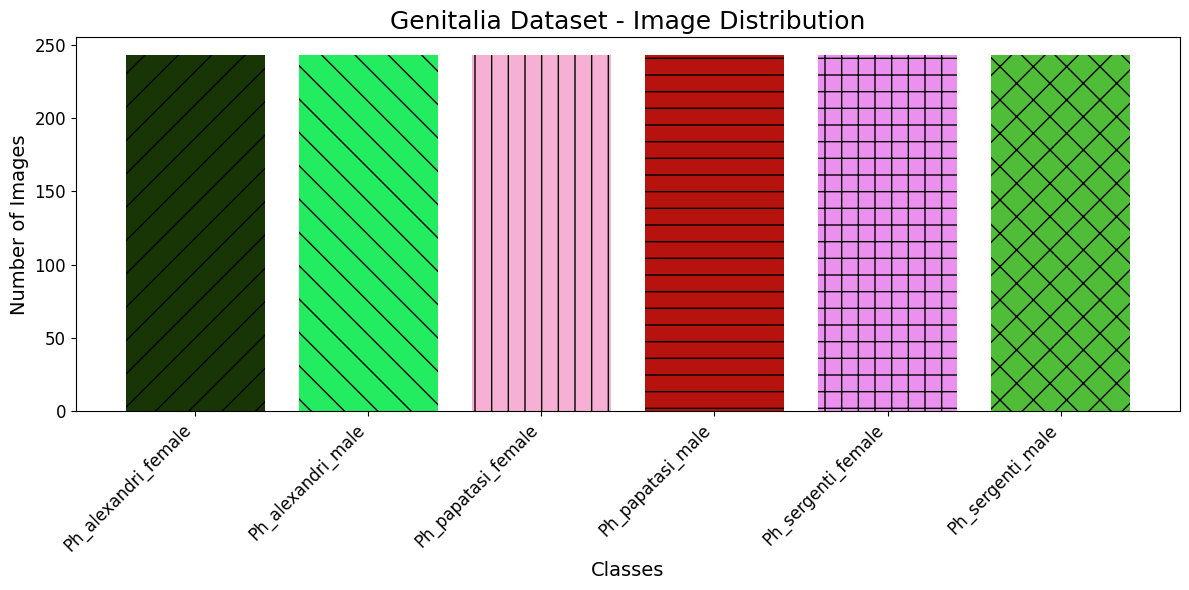


📊 Total images: 1458
📂 Image count per class:

              Class  Number of Images
Ph_alexandri_female               243
  Ph_alexandri_male               243
 Ph_papatasi_female               243
   Ph_papatasi_male               243
 Ph_sergenti_female               243
   Ph_sergenti_male               243


In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict

# Define dataset path
genitalia_path = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET'  # ✅ Adjust if needed

# Count images per class
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
class_counts = defaultdict(int)
total_images = 0

for class_folder in os.listdir(genitalia_path):
    class_path = os.path.join(genitalia_path, class_folder)
    if os.path.isdir(class_path):
        image_files = [
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ]
        count = len(image_files)
        class_counts[class_folder] = count
        total_images += count

# Prepare data for plotting
categories = sorted(class_counts.keys())
image_counts = [class_counts[cls] for cls in categories]

# Plotting
plt.figure(figsize=(12, 6))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"] * (len(categories) // 8 + 1)
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]
bars = plt.bar(categories, image_counts, color=colors)

for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("Genitalia Dataset - Image Distribution", fontsize=18)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
save_path = os.path.join(genitalia_path, "Genitalia_Image_Distribution.png")
plt.savefig(save_path, format="png", dpi=600)
plt.show()

# Table output
df = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(f"\n📊 Total images: {total_images}")
print("📂 Image count per class:\n")
print(df.to_string(index=False))


In [4]:
import shutil
import os
import random

# Define dataset source path
dataset_source = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET"

# Define target paths for train, validation, and test sets
train_path = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/train"
val_path = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/val"
test_path = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test"

# Create directories for train, validation, and test sets if they don't exist
for path in [train_path, val_path, test_path]:
    os.makedirs(path, exist_ok=True)

# Define the split ratios for train, validation, and test
split_ratios = {"train": 0.8, "val": 0.05, "test": 0.15}

# Iterate through each class folder (assuming class-wise folder structure in the dataset)
for class_folder in os.listdir(dataset_source):
    class_path = os.path.join(dataset_source, class_folder)

    # Process only directories (class folders)
    if os.path.isdir(class_path):
        # List only image files within the class folder
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Shuffle the image filenames to randomize the split
        random.shuffle(images)

        # Calculate the number of images for each split
        train_split = int(len(images) * split_ratios["train"])
        val_split = int(len(images) * split_ratios["val"])
        test_split = len(images) - train_split - val_split

        # Split and copy images into respective directories
        for i, img in enumerate(images):
            src_img_path = os.path.join(class_path, img)

            # Determine the target folder based on the split
            if i < train_split:
                dest_folder = os.path.join(train_path, class_folder)
            elif i < train_split + val_split:
                dest_folder = os.path.join(val_path, class_folder)
            else:
                dest_folder = os.path.join(test_path, class_folder)

            # Ensure the target folder exists
            os.makedirs(dest_folder, exist_ok=True)

            # Define the full path for the destination image (with the image name included)
            dest_img_path = os.path.join(dest_folder, img)

            # Copy the image to the appropriate folder
            shutil.copy(src_img_path, dest_img_path)

print("✅ Dataset successfully split into train/val/test (80%/5%/15%)!")


✅ Dataset successfully split into train/val/test (80%/5%/15%)!


In [5]:
import os
from PIL import Image

dataset_dir = '/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET'
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        try:
            img = Image.open(os.path.join(root, file))
            img.verify()  # Verify if it's a valid image
        except (IOError, SyntaxError) as e:
            print(f"Invalid image file: {file} in {root}")
def process_images(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        # Further image processing here
    except (IOError, SyntaxError) as e:
        print(f"Error loading image {file_path}: {e}")


Invalid image file: aug_171.jpg in /content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/Ph_alexandri_male
Invalid image file: aug_171.jpg in /content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_alexandri_male


In [6]:
import os
from PIL import Image

def check_and_remove_corrupted_images(directory):
    invalid_images = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verifies if the file is a valid image
            except (IOError, SyntaxError) as e:
                print(f"Skipping invalid image: {file_path}")
                invalid_images.append(file_path)
                os.remove(file_path)  # Optionally, delete the corrupted image
    return invalid_images

# Apply this function to your dataset
check_and_remove_corrupted_images(train_path)
check_and_remove_corrupted_images(val_path)
check_and_remove_corrupted_images(test_path)


Skipping invalid image: /content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_alexandri_male/aug_171.jpg


['/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET/test/Ph_alexandri_male/aug_171.jpg']

In [7]:
from tensorflow.keras.preprocessing.image import load_img

# Custom function to safely load an image
def safe_load_img_from_directory(directory, target_size):
    valid_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = load_img(file_path, target_size=target_size)
                valid_files.append(file_path)
            except Exception as e:
                print(f"Skipping invalid image: {file_path}")
    return valid_files

# Define IMG_SIZE here
IMG_SIZE = (224, 224)

# Example: Use this function to load valid files
valid_train_images = safe_load_img_from_directory(train_path, IMG_SIZE)
valid_val_images = safe_load_img_from_directory(val_path, IMG_SIZE)
valid_test_images = safe_load_img_from_directory(test_path, IMG_SIZE)

# Use the list of valid files for your data generators

# EfficientNetV2S 😐

# DenseNet201 😐

# CustomCNN ❌

# ResNet50 😐

Found 1164 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 221 images belonging to 6 classes.
82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

🚀 Training EfficientNetV2S for 25 epochs


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4535 - loss: 1.3972
Epoch 1: val_loss improved from inf to 0.55061, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.4553 - loss: 1.3929 - val_accuracy: 0.8333 - val_loss: 0.5506 - learning_rate: 1.0000e-04
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8188 - loss: 0.4946
Epoch 2: val_loss improved from 0.55061 to 0.24942, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 314ms/step - accuracy: 0.8190 - loss: 0.4938 - val_accuracy: 0.9167 - val_loss: 0.2494 - learning_rate: 1.0000e-04
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9187 - loss: 0.2655
Epoch 3: val_loss improved from 0.24942 to 0.19555, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 307ms/step - accuracy: 0.9186 - loss: 0.2655 - val_accuracy: 0.9306 - val_loss: 0.1955 - learning_rate: 1.0000e-04
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9165 - loss: 0.2264
Epoch 4: val_loss improved from 0.19555 to 0.16479, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 335ms/step - accuracy: 0.9166 - loss: 0.2265 - val_accuracy: 0.9722 - val_loss: 0.1648 - learning_rate: 1.0000e-04
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9465 - loss: 0.1682
Epoch 5: val_loss improved from 0.16479 to 0.08073, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 317ms/step - accuracy: 0.9464 - loss: 0.1682 - val_accuracy: 0.9722 - val_loss: 0.0807 - learning_rate: 1.0000e-04
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9632 - loss: 0.1215
Epoch 6: val_loss improved from 0.08073 to 0.05369, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - accuracy: 0.9632 - loss: 0.1215 - val_accuracy: 0.9861 - val_loss: 0.0537 - learning_rate: 1.0000e-04
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.9677 - loss: 0.1254
Epoch 7: val_loss did not improve from 0.05369
73/73 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - accuracy: 0.9676 - loss: 0.1256 - val_accuracy: 0.9861 - val_loss: 0.0752 - learning_rate: 1.0000e-04
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9766 - loss: 0.0893
Epoch 8: val_loss improved from 0.05369 to 0.04333, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 319ms/step - accuracy: 0.9766 - loss: 0.0895 - val_accuracy: 0.9861 - val_loss: 0.0433 - learning_rate: 1.0000e-04
Epoch 9/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9858 - loss: 0.0740
Epoch 9: val_loss did not improve from 0.04333
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 284ms/step - accuracy: 0.9858 - loss: 0.0741 - val_accuracy: 1.0000 - val_loss: 0.0501 - learning_rate: 1.0000e-04
Epoch 10/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9838 - loss: 0.0660
Epoch 10: val_loss improved from 0.04333 to 0.02653, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - accuracy: 0.9838 - loss: 0.0662 - val_accuracy: 1.0000 - val_loss: 0.0265 - learning_rate: 1.0000e-04
Epoch 11/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9797 - loss: 0.0710
Epoch 11: val_loss did not improve from 0.02653
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 292ms/step - accuracy: 0.9797 - loss: 0.0710 - val_accuracy: 0.9861 - val_loss: 0.0467 - learning_rate: 1.0000e-04
Epoch 12/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9806 - loss: 0.0662
Epoch 12: val_loss improved from 0.02653 to 0.02609, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 25s 340ms/step - accuracy: 0.9806 - loss: 0.0664 - val_accuracy: 1.0000 - val_loss: 0.0261 - learning_rate: 1.0000e-04
Epoch 13/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9821 - loss: 0.0892
Epoch 13: val_loss did not improve from 0.02609
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.9821 - loss: 0.0891 - val_accuracy: 0.9861 - val_loss: 0.0488 - learning_rate: 1.0000e-04
Epoch 14/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9759 - loss: 0.0880
Epoch 14: val_loss did not improve from 0.02609
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.9759 - loss: 0.0879 - val_accuracy: 0.9861 - val_loss: 0.0468 - learning_rate: 1.0000e-04
Epoch 15/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9885 - loss: 0.0500
Epoch 15: val_loss did not improve from 0.02609
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - accuracy: 0.9885 - loss: 0.0501 - val_accuracy: 0.9861 - val_loss: 0.0551 - learning_rate: 1.0000e-04
Epoch 16/25

73/73 ━━━━━━━━━━━━━━━━━━━━ 28s 379ms/step - accuracy: 0.9949 - loss: 0.0405 - val_accuracy: 1.0000 - val_loss: 0.0241 - learning_rate: 5.0000e-05
Epoch 24/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9989 - loss: 0.0260
Epoch 24: val_loss improved from 0.02410 to 0.01638, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.9989 - loss: 0.0261 - val_accuracy: 1.0000 - val_loss: 0.0164 - learning_rate: 5.0000e-05
Epoch 25/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9923 - loss: 0.0354
Epoch 25: val_loss improved from 0.01638 to 0.01475, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 321ms/step - accuracy: 0.9923 - loss: 0.0353 - val_accuracy: 1.0000 - val_loss: 0.0147 - learning_rate: 5.0000e-05
✅ Evaluating EfficientNetV2S
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 538ms/step - accuracy: 0.9892 - loss: 0.0414
EfficientNetV2S Test Accuracy: 98.19%


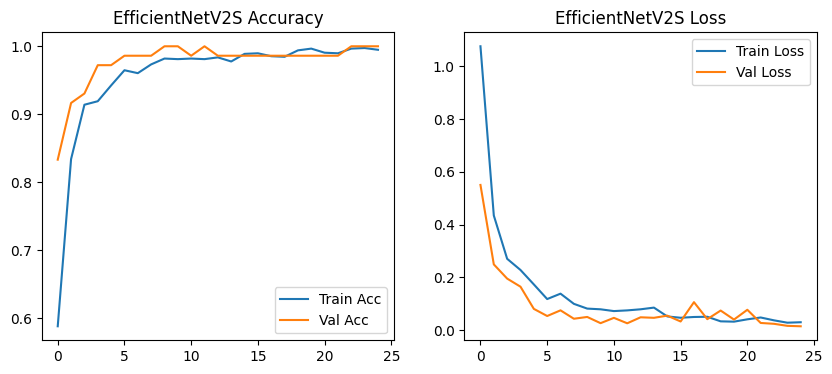

14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 796ms/step
📊 Classification Report for EfficientNetV2S
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        37
  Ph_alexandri_male       0.97      1.00      0.99        36
 Ph_papatasi_female       1.00      0.97      0.99        37
   Ph_papatasi_male       1.00      0.95      0.97        37
 Ph_sergenti_female       0.97      1.00      0.99        37
   Ph_sergenti_male       0.95      0.97      0.96        37

           accuracy                           0.98       221
          macro avg       0.98      0.98      0.98       221
       weighted avg       0.98      0.98      0.98       221



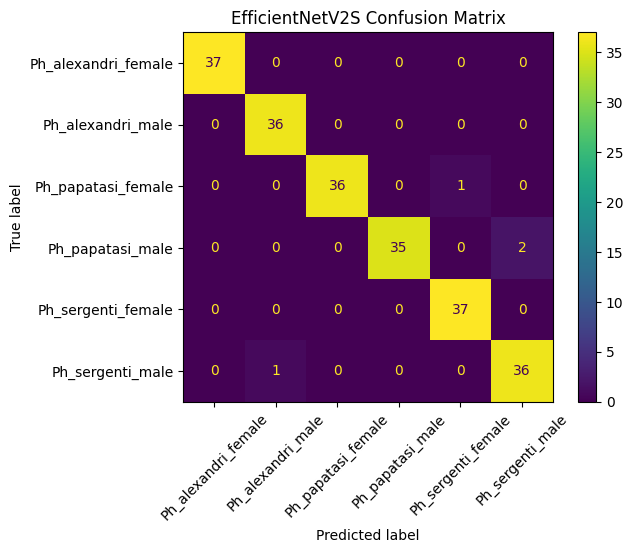


🚀 Training DenseNet201 for 25 epochs
Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5656 - loss: 1.0637
Epoch 1: val_loss did not improve from 0.01475
73/73 ━━━━━━━━━━━━━━━━━━━━ 771s 5s/step - accuracy: 0.5676 - loss: 1.0588 - val_accuracy: 0.7361 - val_loss: 0.6133 - learning_rate: 1.0000e-04
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.8894 - loss: 0.3063
Epoch 2: val_loss did not improve from 0.01475
73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 330ms/step - accuracy: 0.8895 - loss: 0.3060 - val_accuracy: 0.8194 - val_loss: 0.4889 - learning_rate: 1.0000e-04
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.9222 - loss: 0.1999
Epoch 3: val_loss did not improve from 0.01475
73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 332ms/step - accuracy: 0.9224 - loss: 0.1998 - val_accuracy: 0.9167 - val_loss: 0.3164 - learning_rate: 1.0000e-04
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.9408 - loss: 0.1786
Epoch 4: val_loss did not improve from 0.014

73/73 ━━━━━━━━━━━━━━━━━━━━ 48s 419ms/step - accuracy: 0.9957 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 0.0126 - learning_rate: 1.0000e-04
✅ Evaluating DenseNet201
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9985 - loss: 0.0118
DenseNet201 Test Accuracy: 99.10%


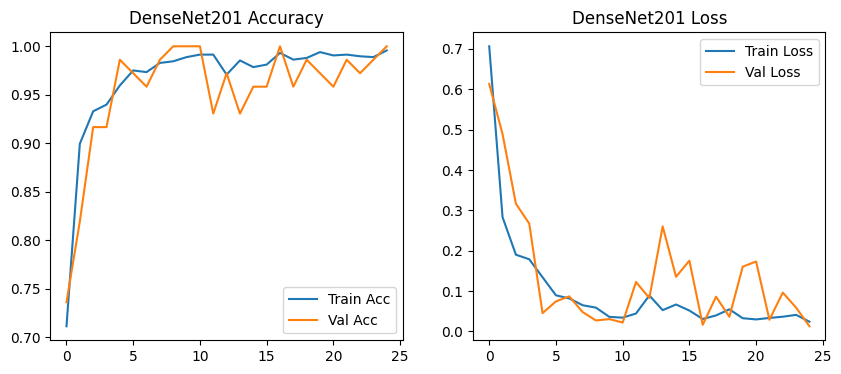

14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step
📊 Classification Report for DenseNet201
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        37
  Ph_alexandri_male       0.95      1.00      0.97        36
 Ph_papatasi_female       1.00      1.00      1.00        37
   Ph_papatasi_male       1.00      1.00      1.00        37
 Ph_sergenti_female       1.00      1.00      1.00        37
   Ph_sergenti_male       1.00      0.95      0.97        37

           accuracy                           0.99       221
          macro avg       0.99      0.99      0.99       221
       weighted avg       0.99      0.99      0.99       221



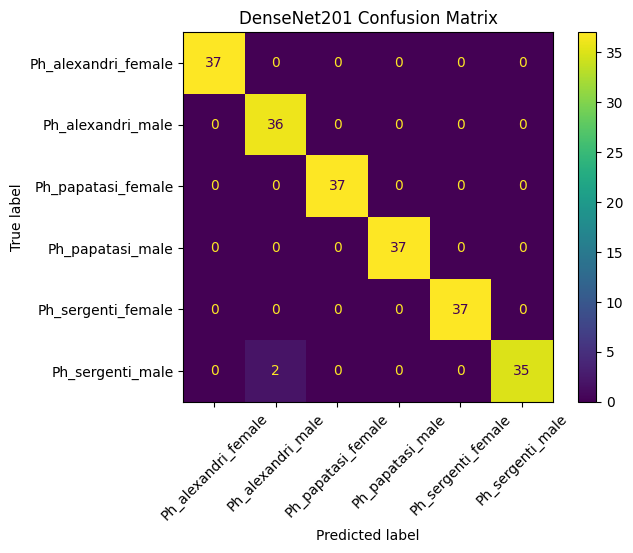


🚀 Training CustomCNN for 25 epochs
Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.1811 - loss: 1.9091
Epoch 1: val_loss did not improve from 0.01261
73/73 ━━━━━━━━━━━━━━━━━━━━ 30s 315ms/step - accuracy: 0.1811 - loss: 1.9086 - val_accuracy: 0.2917 - val_loss: 1.7921 - learning_rate: 0.0010
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.2305 - loss: 1.7364
Epoch 2: val_loss did not improve from 0.01261
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 236ms/step - accuracy: 0.2312 - loss: 1.7353 - val_accuracy: 0.4167 - val_loss: 1.3636 - learning_rate: 0.0010
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.4259 - loss: 1.3964
Epoch 3: val_loss did not improve from 0.01261
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.4254 - loss: 1.3966 - val_accuracy: 0.5417 - val_loss: 1.3365 - learning_rate: 0.0010
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.3576 - loss: 1.3573
Epoch 4: val_loss did not improve from 0.01261
73/73 

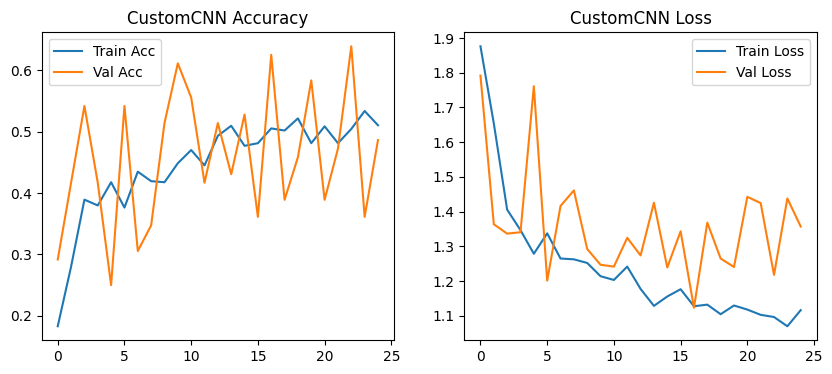

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
📊 Classification Report for CustomCNN
                     precision    recall  f1-score   support

Ph_alexandri_female       0.51      0.59      0.55        37
  Ph_alexandri_male       0.57      0.69      0.62        36
 Ph_papatasi_female       0.49      0.51      0.50        37
   Ph_papatasi_male       0.27      0.22      0.24        37
 Ph_sergenti_female       0.57      0.11      0.18        37
   Ph_sergenti_male       0.47      0.73      0.57        37

           accuracy                           0.48       221
          macro avg       0.48      0.48      0.44       221
       weighted avg       0.48      0.48      0.44       221



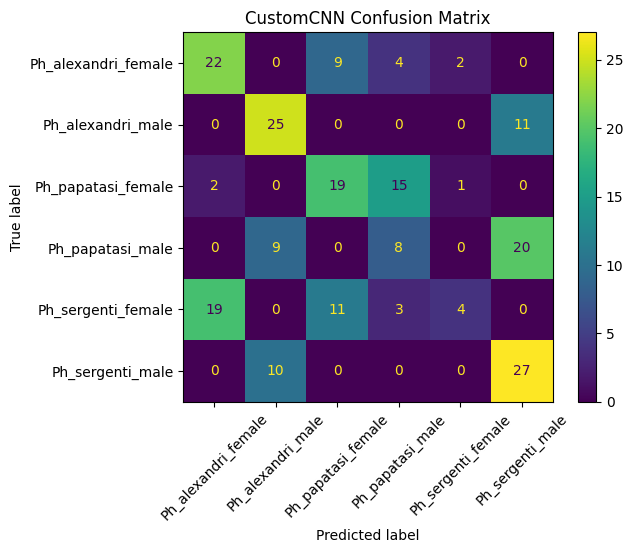


🚀 Training ResNet50 for 25 epochs
Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.5383 - loss: 1.1517
Epoch 1: val_loss did not improve from 0.01261
73/73 ━━━━━━━━━━━━━━━━━━━━ 115s 728ms/step - accuracy: 0.5402 - loss: 1.1470 - val_accuracy: 0.1806 - val_loss: 1.9305 - learning_rate: 1.0000e-04
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.8378 - loss: 0.4746
Epoch 2: val_loss did not improve from 0.01261
73/73 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - accuracy: 0.8380 - loss: 0.4740 - val_accuracy: 0.1667 - val_loss: 2.5055 - learning_rate: 1.0000e-04
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9059 - loss: 0.2645
Epoch 3: val_loss did not improve from 0.01261
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 288ms/step - accuracy: 0.9059 - loss: 0.2647 - val_accuracy: 0.1667 - val_loss: 2.2081 - learning_rate: 1.0000e-04
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9232 - loss: 0.2166
Epoch 4: val_loss did not improve from 0.

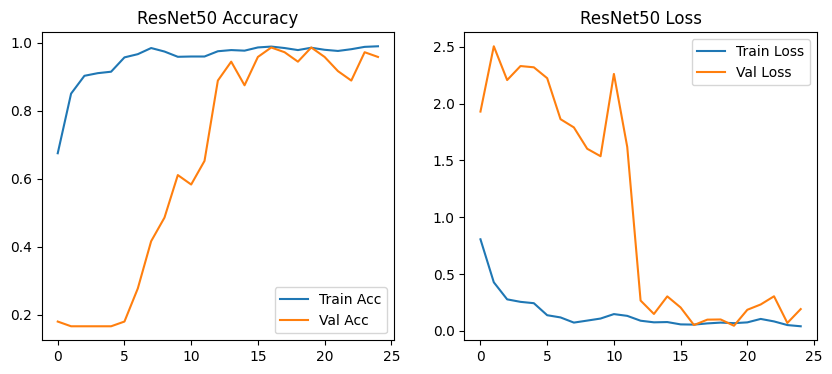

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms/step
📊 Classification Report for ResNet50
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      0.92      0.96        37
  Ph_alexandri_male       0.81      0.97      0.89        36
 Ph_papatasi_female       1.00      0.97      0.99        37
   Ph_papatasi_male       1.00      1.00      1.00        37
 Ph_sergenti_female       0.90      1.00      0.95        37
   Ph_sergenti_male       0.97      0.78      0.87        37

           accuracy                           0.94       221
          macro avg       0.95      0.94      0.94       221
       weighted avg       0.95      0.94      0.94       221



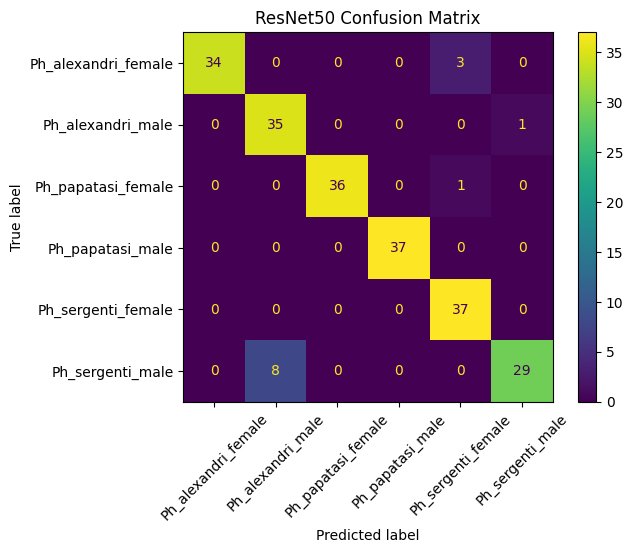


🤝 Evaluating Ensemble Model (Average Fusion) - Basic Models
Ensemble Test Accuracy (Basic): 99.55%
📊 Classification Report for Ensemble (Basic)
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      1.00      1.00        37
  Ph_alexandri_male       0.97      1.00      0.99        36
 Ph_papatasi_female       1.00      1.00      1.00        37
   Ph_papatasi_male       1.00      1.00      1.00        37
 Ph_sergenti_female       1.00      1.00      1.00        37
   Ph_sergenti_male       1.00      0.97      0.99        37

           accuracy                           1.00       221
          macro avg       1.00      1.00      1.00       221
       weighted avg       1.00      1.00      1.00       221



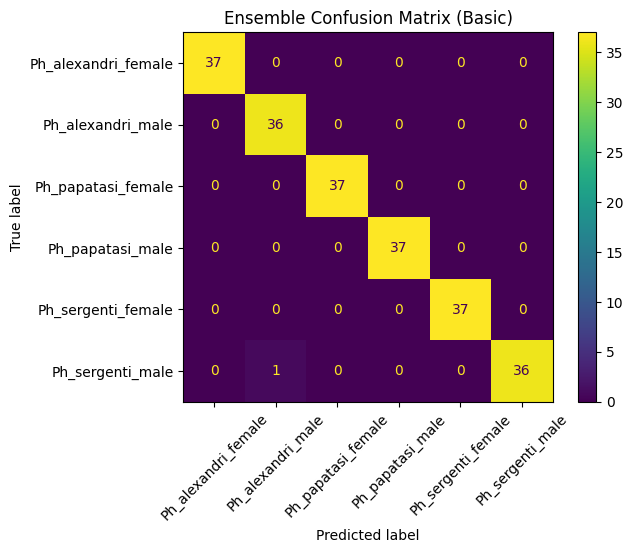

In [8]:
# --- Install dependencies ---
!pip install tensorflow matplotlib scikit-learn

# --- Imports ---
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import (Dropout, GlobalAveragePooling2D, Reshape, Dense, Conv2D, MaxPooling2D, Input)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2S, DenseNet201, ResNet50
from PIL import Image

# --- Dataset paths ---
dataset_source = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET"
train_path = f"{dataset_source}/train"
val_path = f"{dataset_source}/val"
test_path = f"{dataset_source}/test"

# --- Image parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size for memory efficiency

# --- Data generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# --- Global config ---
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes

# --- Basic Model builders without attention ---
def build_model_basic(base_model_func, name="Model"):
    base_model = base_model_func(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=x, name=name)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_custom_cnn_basic():
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(inputs)
    x = MaxPooling2D()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)
    model = Model(inputs, outputs, name="CustomCNN")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1),  # Patience updated to 10
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)  # Save best model
]

# --- Models to train ---
models_basic = {
    "EfficientNetV2S": build_model_basic(EfficientNetV2S, "EffNetV2S"),
    "DenseNet201": build_model_basic(DenseNet201, "DenseNet201"),
    "CustomCNN": build_custom_cnn_basic(),
    "ResNet50": build_model_basic(ResNet50, "ResNet50")
}

# --- Training and evaluation (for the simplified models) ---
history_dict_basic = {}
model_predictions_basic = {}
model_results_basic = {}

for name, model in models_basic.items():
    print(f"\n🚀 Training {name} for 25 epochs")  # Epochs updated to 25
    history = model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)  # Epochs updated to 25
    history_dict_basic[name] = history

    pd.DataFrame(history.history).to_csv(f"{name}_history_basic.csv", index=False)

    print(f"✅ Evaluating {name}")
    loss, acc = model.evaluate(test_gen)
    print(f"{name} Test Accuracy: {acc * 100:.2f}%")
    model_results_basic[name] = acc

    # Plotting the performance
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f"{name} Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{name} Loss")
    plt.legend()
    plt.show()

    # Making predictions and evaluating
    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_gen.classes
    model_predictions_basic[name] = preds

    print(f"📊 Classification Report for {name}")
    print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
    disp.plot(xticks_rotation=45)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# --- Ensemble (basic models) ---
print("\n🤝 Evaluating Ensemble Model (Average Fusion) - Basic Models")
ensemble_preds_basic = np.mean(list(model_predictions_basic.values()), axis=0)
y_pred_ensemble_basic = np.argmax(ensemble_preds_basic, axis=1)
ensemble_acc_basic = np.mean(y_pred_ensemble_basic == test_gen.classes)
print(f"Ensemble Test Accuracy (Basic): {ensemble_acc_basic * 100:.2f}%")

print("📊 Classification Report for Ensemble (Basic)")
print(classification_report(test_gen.classes, y_pred_ensemble_basic, target_names=list(test_gen.class_indices.keys())))
cm = confusion_matrix(test_gen.classes, y_pred_ensemble_basic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(xticks_rotation=45)
plt.title("Ensemble Confusion Matrix (Basic)")
plt.show()


# MobileNetV2 😐

Found 1164 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 221 images belonging to 6 classes.

🚀 Training MobileNetV2_Basic for 25 epochs
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.4168 - loss: 1.4578
Epoch 1: val_loss improved from inf to 0.93004, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 52s 428ms/step - accuracy: 0.4185 - loss: 1.4534 - val_accuracy: 0.6111 - val_loss: 0.9300 - learning_rate: 1.0000e-04
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.7205 - loss: 0.6668
Epoch 2: val_loss improved from 0.93004 to 0.71610, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - accuracy: 0.7210 - loss: 0.6661 - val_accuracy: 0.6528 - val_loss: 0.7161 - learning_rate: 1.0000e-04
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.7864 - loss: 0.5425
Epoch 3: val_loss improved from 0.71610 to 0.64082, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.7867 - loss: 0.5421 - val_accuracy: 0.7917 - val_loss: 0.6408 - learning_rate: 1.0000e-04
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.8387 - loss: 0.4227
Epoch 4: val_loss improved from 0.64082 to 0.43891, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 250ms/step - accuracy: 0.8388 - loss: 0.4228 - val_accuracy: 0.8333 - val_loss: 0.4389 - learning_rate: 1.0000e-04
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8534 - loss: 0.4364
Epoch 5: val_loss did not improve from 0.43891
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.8536 - loss: 0.4358 - val_accuracy: 0.7778 - val_loss: 0.4491 - learning_rate: 1.0000e-04
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8846 - loss: 0.3490
Epoch 6: val_loss did not improve from 0.43891
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - accuracy: 0.8844 - loss: 0.3491 - val_accuracy: 0.8194 - val_loss: 0.4508 - learning_rate: 1.0000e-04
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.8704 - loss: 0.3600
Epoch 7: val_loss improved from 0.43891 to 0.32359, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - accuracy: 0.8704 - loss: 0.3599 - val_accuracy: 0.8750 - val_loss: 0.3236 - learning_rate: 1.0000e-04
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.9181 - loss: 0.2502
Epoch 8: val_loss improved from 0.32359 to 0.17343, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.9181 - loss: 0.2503 - val_accuracy: 0.9167 - val_loss: 0.1734 - learning_rate: 1.0000e-04
Epoch 9/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.9192 - loss: 0.2507
Epoch 9: val_loss did not improve from 0.17343
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - accuracy: 0.9193 - loss: 0.2505 - val_accuracy: 0.9028 - val_loss: 0.2322 - learning_rate: 1.0000e-04
Epoch 10/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8957 - loss: 0.2483
Epoch 10: val_loss did not improve from 0.17343
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 218ms/step - accuracy: 0.8960 - loss: 0.2481 - val_accuracy: 0.9444 - val_loss: 0.1857 - learning_rate: 1.0000e-04
Epoch 11/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.9244 - loss: 0.2096
Epoch 11: val_loss improved from 0.17343 to 0.11920, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - accuracy: 0.9244 - loss: 0.2094 - val_accuracy: 0.9444 - val_loss: 0.1192 - learning_rate: 1.0000e-04
Epoch 12/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9552 - loss: 0.1613
Epoch 12: val_loss improved from 0.11920 to 0.10447, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - accuracy: 0.9550 - loss: 0.1617 - val_accuracy: 0.9722 - val_loss: 0.1045 - learning_rate: 1.0000e-04
Epoch 13/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9489 - loss: 0.1640
Epoch 13: val_loss did not improve from 0.10447
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - accuracy: 0.9488 - loss: 0.1644 - val_accuracy: 0.9306 - val_loss: 0.2344 - learning_rate: 1.0000e-04
Epoch 14/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.9437 - loss: 0.1950
Epoch 14: val_loss did not improve from 0.10447
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 243ms/step - accuracy: 0.9437 - loss: 0.1947 - val_accuracy: 0.9583 - val_loss: 0.1967 - learning_rate: 1.0000e-04
Epoch 15/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.9363 - loss: 0.1663
Epoch 15: val_loss did not improve from 0.10447
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 244ms/step - accuracy: 0.9364 - loss: 0.1662 - val_accuracy: 0.9583 - val_loss: 0.1290 - learning_rate: 1.0000e-04
Epoch 16/25

73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - accuracy: 0.9324 - loss: 0.2026 - val_accuracy: 0.9722 - val_loss: 0.0743 - learning_rate: 1.0000e-04
Epoch 17/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9290 - loss: 0.1840
Epoch 17: val_loss did not improve from 0.07433
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.9291 - loss: 0.1840 - val_accuracy: 0.9167 - val_loss: 0.1805 - learning_rate: 1.0000e-04
Epoch 18/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9581 - loss: 0.1388
Epoch 18: val_loss did not improve from 0.07433
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - accuracy: 0.9580 - loss: 0.1390 - val_accuracy: 0.9722 - val_loss: 0.0870 - learning_rate: 1.0000e-04
Epoch 19/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9525 - loss: 0.1401
Epoch 19: val_loss did not improve from 0.07433
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - accuracy: 0.9525 - loss: 0.1401 - val_accuracy: 0.9722 - val_loss: 0.0978 - learning_rate: 1.0000e-04
Epoch 20/25

73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.9623 - loss: 0.1167 - val_accuracy: 0.9722 - val_loss: 0.0658 - learning_rate: 1.0000e-04
Epoch 22/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9639 - loss: 0.1050
Epoch 22: val_loss improved from 0.06577 to 0.06077, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - accuracy: 0.9639 - loss: 0.1049 - val_accuracy: 0.9861 - val_loss: 0.0608 - learning_rate: 1.0000e-04
Epoch 23/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9651 - loss: 0.1273
Epoch 23: val_loss improved from 0.06077 to 0.04461, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.9649 - loss: 0.1275 - val_accuracy: 0.9861 - val_loss: 0.0446 - learning_rate: 1.0000e-04
Epoch 24/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9623 - loss: 0.1262
Epoch 24: val_loss did not improve from 0.04461
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - accuracy: 0.9623 - loss: 0.1261 - val_accuracy: 0.9722 - val_loss: 0.0571 - learning_rate: 1.0000e-04
Epoch 25/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9600 - loss: 0.1036
Epoch 25: val_loss improved from 0.04461 to 0.04068, saving model to best_model_mobilenetv2_basic.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 243ms/step - accuracy: 0.9601 - loss: 0.1035 - val_accuracy: 0.9861 - val_loss: 0.0407 - learning_rate: 1.0000e-04
✅ Evaluating MobileNetV2_Basic
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.9386 - loss: 0.1705
MobileNetV2_Basic Test Accuracy: 96.38%


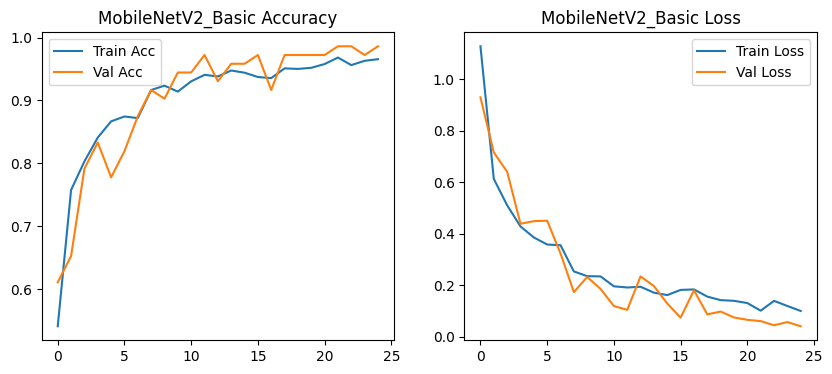

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step
📊 Classification Report for MobileNetV2_Basic
                     precision    recall  f1-score   support

Ph_alexandri_female       1.00      0.92      0.96        37
  Ph_alexandri_male       0.97      0.92      0.94        36
 Ph_papatasi_female       1.00      1.00      1.00        37
   Ph_papatasi_male       1.00      0.97      0.99        37
 Ph_sergenti_female       0.93      1.00      0.96        37
   Ph_sergenti_male       0.90      0.97      0.94        37

           accuracy                           0.96       221
          macro avg       0.97      0.96      0.96       221
       weighted avg       0.97      0.96      0.96       221



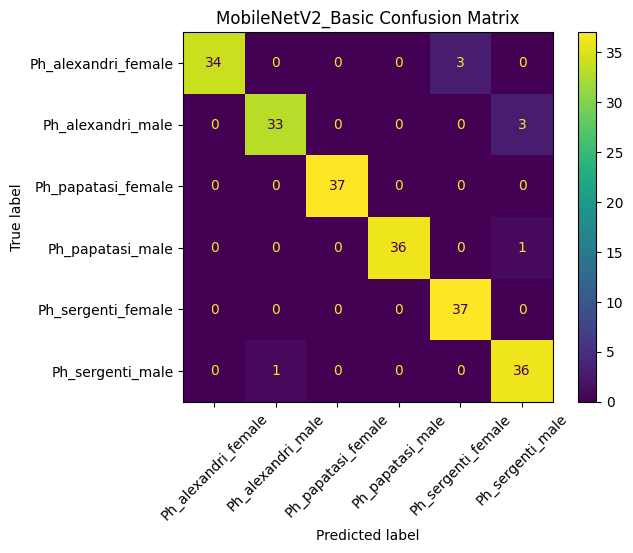

In [10]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Reshape,
                                     Lambda, Add, Concatenate, Input, GlobalMaxPooling2D)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# --- Dataset paths ---
dataset_source = "/content/Genitalia_Balanced_DATASET/Genitalia_Balanced_DATASET"
train_path = f"{dataset_source}/train"
val_path = f"{dataset_source}/val"
test_path = f"{dataset_source}/test"

# --- Image parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size for memory efficiency

# --- Data generators with enhanced data augmentation ---
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    zoom_range=0.3,  # Increased zoom range
    shear_range=0.2,  # Added shear range
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# --- Global config ---
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes

# --- Basic MobileNetV2 Model (without CBAM or SE) ---
def build_mobilenetv2_basic():
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    base_model.trainable = True  # Unfreeze the entire model
    for layer in base_model.layers[:-20]:  # Optionally freeze the earlier layers
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Adjusted dropout

    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=outputs, name="MobileNetV2_Basic")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1),  # Patience updated to 10
    ModelCheckpoint('best_model_mobilenetv2_basic.h5', monitor='val_loss', save_best_only=True, verbose=1)  # Save best model
]

# --- Training the MobileNetV2_Basic Model ---
history_dict = {}
model_predictions = {}
model_results = {}

# Train the MobileNetV2_Basic model
print("\n🚀 Training MobileNetV2_Basic for 25 epochs")  # Epochs updated to 25
history = build_mobilenetv2_basic().fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks)
history_dict["MobileNetV2_Basic"] = history

# Save training history to CSV
pd.DataFrame(history.history).to_csv("MobileNetV2_Basic_history.csv", index=False)

# Evaluate the model
print(f"✅ Evaluating MobileNetV2_Basic")
loss, acc = history.model.evaluate(test_gen)
print(f"MobileNetV2_Basic Test Accuracy: {acc * 100:.2f}%")
model_results["MobileNetV2_Basic"] = acc

# Plot training/validation accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("MobileNetV2_Basic Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MobileNetV2_Basic Loss")
plt.legend()
plt.show()

# Classification Report and Confusion Matrix
preds = history.model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
model_predictions["MobileNetV2_Basic"] = preds

print(f"📊 Classification Report for MobileNetV2_Basic")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(xticks_rotation=45)
plt.title("MobileNetV2_Basic Confusion Matrix")
plt.show()
